In [6]:
# carregando as bibliotecas4

## trabalhar com os dados
import pandas as pd

## separar base em treino teste
from sklearn.model_selection import train_test_split

## modelos/algoritmos

from sklearn.ensemble import RandomForestClassifier

## Métricas de acurácia

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

## trabalhar com figuras

import seaborn as sns
import matplotlib.pyplot as plt 

## selecionar variaveis importantes

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

## tunar parametros

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
# carregando os dados

url = 'https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv'

df = pd.read_csv(url)
df

# separando em preditoras e respostaa

x = df.drop('booking_status', axis = 1)
y = df['booking_status']


# fixando as sementes aleatórias (garantir reprodutibilidade)
SEED = 50
SEED2 = 2

# separando as bases treino e teste
x_treino,x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED,
                                                       test_size= 0.3, stratify=y)

# definindo modelo

modelo  = RandomForestClassifier(n_estimators=20, random_state=SEED2)

# setando parametros para validação cruzada

parametros_busca = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2] 
}

# grid search

grid_search = GridSearchCV(estimator=modelo,
                           param_grid=parametros_busca,
                           scoring='accuracy',
                           cv = 5,
                           n_jobs=-1)

# executando a validação cruzada

grid_search.fit(x_treino, y_treino) 



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=20, random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [3]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [4]:
parametros = {'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state': 2}

In [5]:
modelo = RandomForestClassifier(**parametros)

In [7]:
cv = StratifiedKFold(5, shuffle=True, random_state=500)

In [8]:
rfecv = RFECV(
    estimator=modelo,
    step = 1,
    cv = cv,
    scoring='roc_auc',
    min_features_to_select=1,
    importance_getter='auto'
)

In [9]:
rfecv.fit(x_treino, y_treino)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, random_state=2),
      scoring='roc_auc')

In [10]:
print(f'O numero ideal de features é: {rfecv.n_features_}')

O numero ideal de features é: 25


In [11]:
print(f'O ranking das features {rfecv.ranking_}')

O ranking das features [1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]


In [12]:
print(f'Score: {rfecv.cv_results_}')

Score: {'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.77913523, 0.88305492, 0.90862325, 0.94651964, 0.95776255,
       0.95994017, 0.96338291, 0.96326103, 0.96628728, 0.96

In [13]:
y_pred = rfecv.predict(x_teste)

In [14]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

<Axes: >

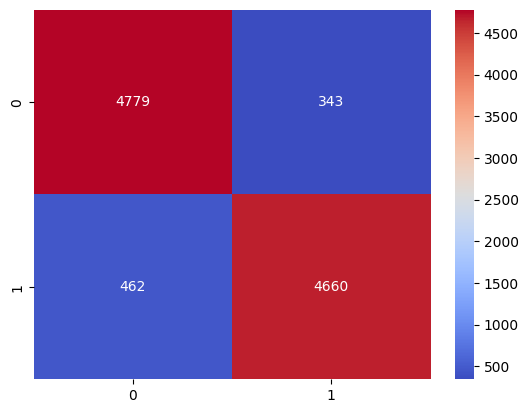

In [15]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt = 'd')

In [16]:
resultado = rfecv.cv_results_

In [17]:
resultado['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

In [19]:
results_df = pd.DataFrame({'Valores': resultado['mean_test_score']})

<Axes: xlabel='None', ylabel='Valores'>

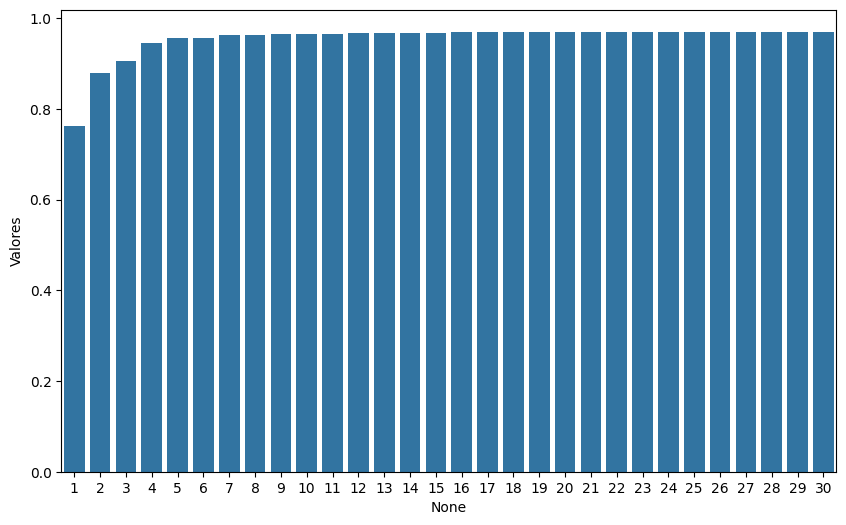

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index+1, y = 'Valores', data= results_df)